# The Challenge
Your task is to develop a model that predicts whether a biopsied breast cell is benign (not harmful) or malignant (cancerous), given a set of attributes about the cell.

# Database Summary

Download: https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data

Description:  https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Original)
The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed from the data itself: 

Group 1: 367 instances (January 1989) 
Group 2: 70 instances (October 1989) 
Group 3: 31 instances (February 1990) 
Group 4: 17 instances (April 1990) 
Group 5: 48 instances (August 1990) 
Group 6: 49 instances (Updated January 1991) 
Group 7: 31 instances (June 1991) 
Group 8: 86 instances (November 1991) 

----------------------------------------- 

Total: 699 points (as of the donated datbase on 15 July 1992) 

Note that the results summarized above in Past Usage refer to a dataset of size 369, while Group 1 has only 367 instances. This is because it originally contained 369 instances; 2 were removed. 

Attribute Information:

1. Sample code number: id number 
2. Clump Thickness: 1 - 10 
3. Uniformity of Cell Size: 1 - 10 
4. Uniformity of Cell Shape: 1 - 10 
5. Marginal Adhesion: 1 - 10 
6. Single Epithelial Cell Size: 1 - 10 
7. Bare Nuclei: 1 - 10 
8. Bland Chromatin: 1 - 10 
9. Normal Nucleoli: 1 - 10 
10. Mitoses: 1 - 10 
11. Class: (2 for benign, 4 for malignant)



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import roc_curve, auc,classification_report
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

%matplotlib inline

# Data Reading and Peaking
Upload the CSV file into pandas dataframe 

In [4]:
df = pd.DataFrame.from_csv('data_text.csv')
df.head()


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
ID,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1000025 to 897471
Data columns (total 10 columns):
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(9), object(1)
memory usage: 60.1+ KB


In [6]:
df.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Data Cleaning
Check if there is any null values in the dataset, Check if all the values in the pandas columns have integer values


In [7]:
df.isnull().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [8]:
df.applymap(np.isreal).all()

Clump Thickness                 True
Uniformity of Cell Size         True
Uniformity of Cell Shape        True
Marginal Adhesion               True
Single Epithelial Cell Size     True
Bare Nuclei                    False
Bland Chromatin                 True
Normal Nucleoli                 True
Mitoses                         True
Class                           True
dtype: bool

It is not true for Bare Nuclei feature so we try to see what datatype it has
The type is string so we need to do casting to change it to numerical values 
but before we do that we want to get a sense of values in that column

In [9]:
type(df.iloc[1]['Bare Nuclei'])


str

In [10]:
df.groupby('Bare Nuclei')['Bare Nuclei'].count()

Bare Nuclei
1     402
10    132
2      30
3      28
4      19
5      30
6       4
7       8
8      21
9       9
?      16
Name: Bare Nuclei, dtype: int64

In [11]:
#We see that we have 16 rows with missing values (?)
df[df['Bare Nuclei'] == '?']['Bare Nuclei']

ID
1057013    ?
1096800    ?
1183246    ?
1184840    ?
1193683    ?
1197510    ?
1241232    ?
169356     ?
432809     ?
563649     ?
606140     ?
61634      ?
704168     ?
733639     ?
1238464    ?
1057067    ?
Name: Bare Nuclei, dtype: object

In [12]:
#Since it is only 16 rows(0.022 of our data) we want to drop these rows so 
#we replace the '?' with null value (np.nan) and then drop the null values
#df['Class'] = df['Class'].replace('?', np.NaN)
df = df.applymap(lambda x: np.nan if x == '?' else x)

print df.isnull().sum()
df = df.dropna()

#bool_list = []
#for bare_nuclei in df['Bare Nuclei']:
#    if bare_nuclei == '?':
#        bool_list.append(False)
#    else:
#        bool_list.append(True)
#df = df[bool_list]

Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64


In [13]:
df['Bare Nuclei'] = df['Bare Nuclei'].astype(int)
df.applymap(np.isreal).all()

Clump Thickness                True
Uniformity of Cell Size        True
Uniformity of Cell Shape       True
Marginal Adhesion              True
Single Epithelial Cell Size    True
Bare Nuclei                    True
Bland Chromatin                True
Normal Nucleoli                True
Mitoses                        True
Class                          True
dtype: bool

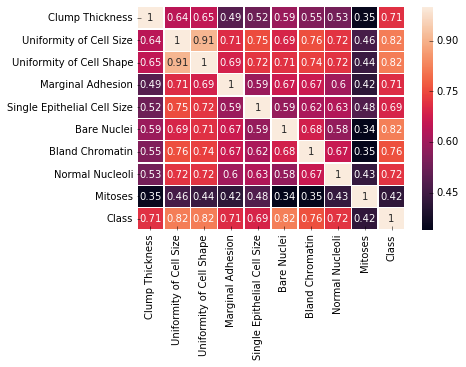

In [14]:
sns.heatmap(df.corr(), annot=True, linewidths=.5)
plt.show()
#sns.heatmap(df.corr(), 
#        xticklabels=df.columns,
#        yticklabels=df.columns)

#plt.matshow(df.corr())
#plt.colorbar()

#plt.show()

In [15]:
df['Class'].replace([2], 0,inplace=True)
df['Class'].replace([4], 1,inplace=True)

In [16]:
# Quick glimpse of tumor features (mean values) in relation to diagnosis
df.groupby('Class').mean()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
Class,,,,,,,,,
0,2.963964,1.306306,1.414414,1.346847,2.108108,1.346847,2.083333,1.261261,1.065315
1,7.188285,6.577406,6.560669,5.585774,5.326360,7.627615,5.974895,5.857741,2.602510


# Separate by malignancy class
We want to examine the distributions of the features with respect to the class. Following will be distributions of each feature separaed by class. This gives us a feel for how each feature correlates with malignancy.

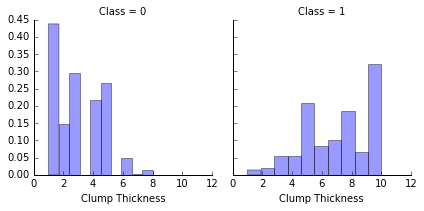

In [26]:
g = sns.FacetGrid(df, col='Class')
g.map(sns.distplot, 'Clump Thickness', bins=10, kde=False, norm_hist=True)   

In [21]:
def pretty_plot_whole(col):
    x = df[col]
    f, (ax_box, ax_hist) = plt.subplots(2,sharex = True,gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(x,ax=ax_box)
    sns.distplot(x, ax=ax_hist,bins=20)
    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)
    #sns.plt.xlim(0,)
    ax_box.set(title='Distribution of ' + col)

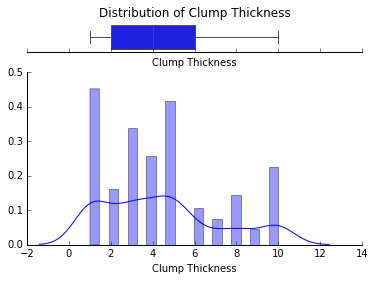

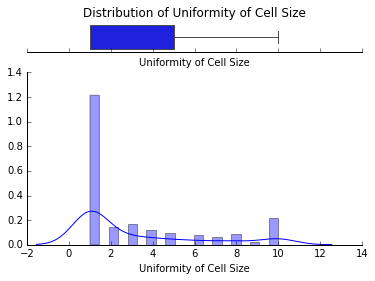

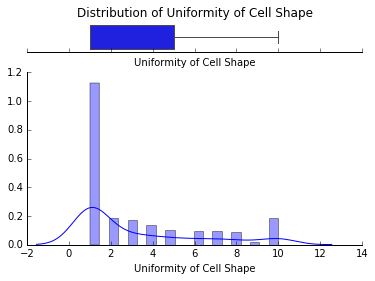

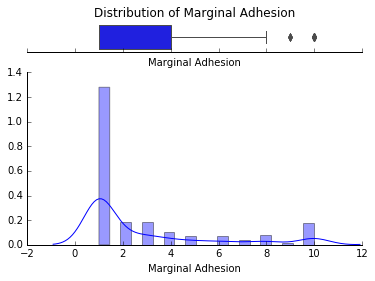

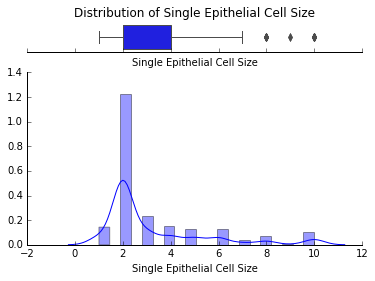

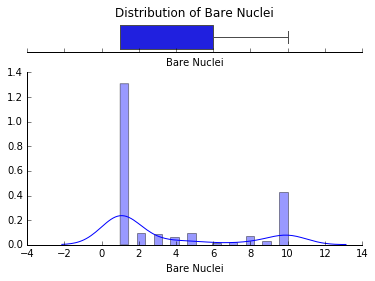

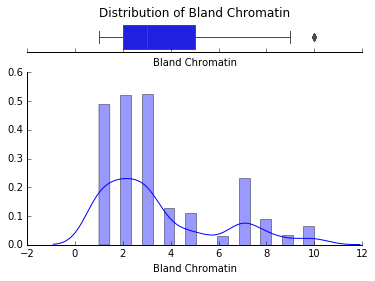

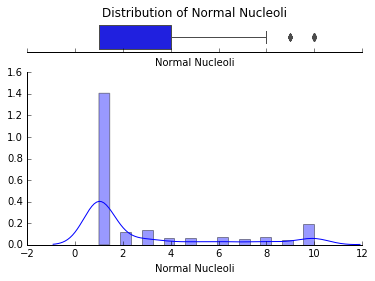

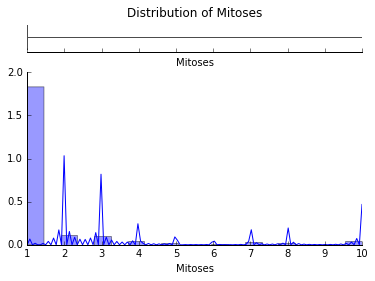

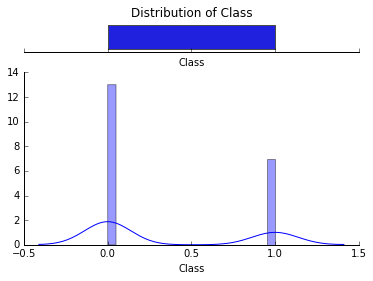

In [22]:
for col in df.columns:
    pretty_plot_whole(col)

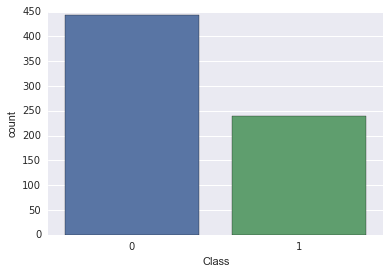

In [138]:

#Plot Data

sns.set(style="darkgrid")
ax = sns.countplot(x="Class", data=df)
plt.show()

In [139]:
def pretty_plot(col):
    x_good = df[df['Class'] == 0][col]
    x_bad = df[df['Class'] == 1][col]
    #sns.set(style='ticks')
    #f, (ax_box, ax_hist) = plt.subplots(2,sharex = True,gridspec_kw={"height_ratios": (.15, .85)})
    
    #sns.boxplot(x_good,ax=ax_box)
    #sns.boxplot(x_bad,ax=ax_box)
    f, ax_hist = plt.subplots(1)
    sns.distplot(x_good, ax=ax_hist,bins=20)
    sns.distplot(x_bad, ax=ax_hist,bins=20)
    #sns.plt.xlim(0,)
    ax_hist.set(title='Distribution of ' + col)

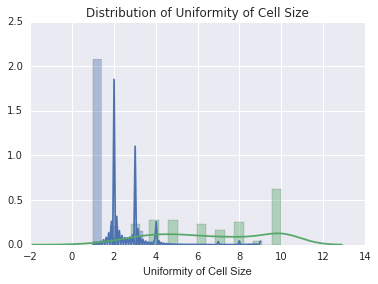

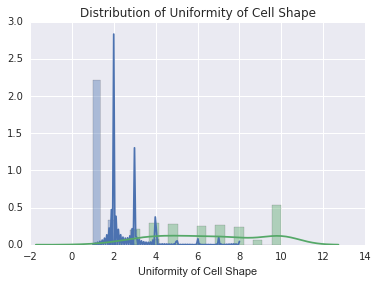

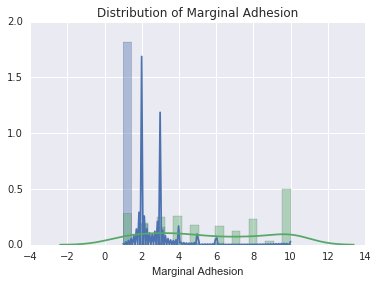

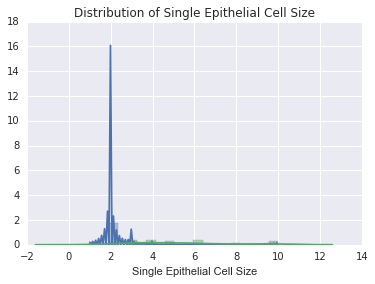

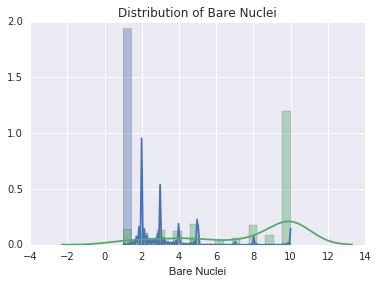

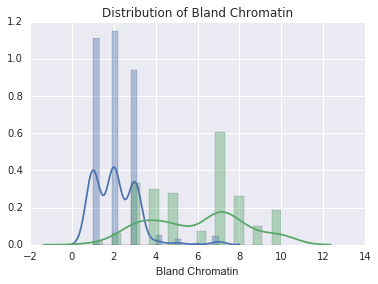

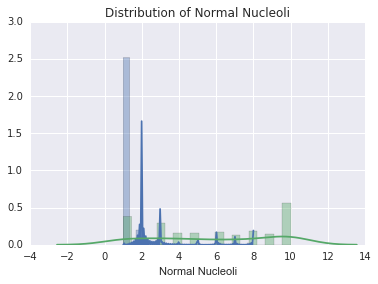

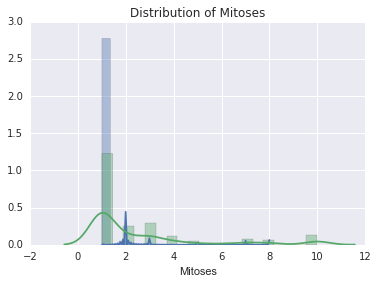

In [140]:
for col in df.columns[1:len(df.columns)-1]:
    pretty_plot(col)

In [141]:
def show_accuracy(y_test, y_predict):

        from sklearn.metrics import precision_recall_fscore_support

        [per, rec, f1, NoImp] = metrics.precision_recall_fscore_support(y_test, y_predict, average='macro')
        acc = metrics.accuracy_score(y_test, y_predict)
        print "Accuracy = %f percision = %f recall= %f F1_score= %f" % (acc, per, rec, f1)


In [19]:
feature_names= ['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses']
features =df[feature_names]
X = np.array(features)
y = df['Class']

In [155]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


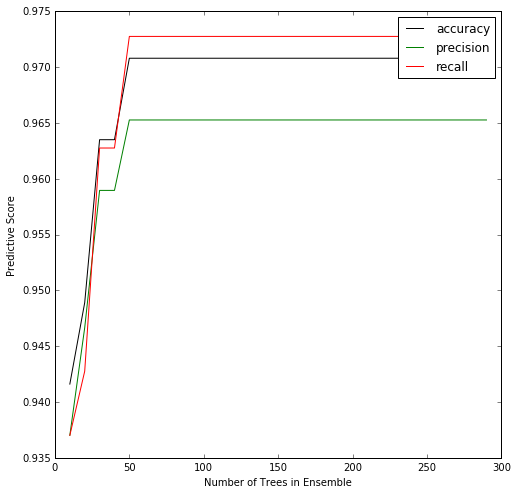

In [158]:
## Try random forest classifier. Compute the accuracy, precision, and recall scores for different ensemble sizes and
## plot results in order to select best size.

ensemble_size_list = list(range(10,300,10))
accuracy_list = []
rec_list = []
pre_list = []

for size in ensemble_size_list:
    rfc_model = RandomForestClassifier(n_estimators = size, random_state = 0)
    rfc_model.fit(X_train, y_train)
    y_predict = rfc_model.predict(X_test)
    [pre, rec, f1, NoImp] = metrics.precision_recall_fscore_support(y_test, y_predict, average='macro')
    accuracy_list.append(rfc_model.score(X_test, y_test))
    rec_list.append(rec)
    pre_list.append(pre)

plt.figure(figsize = (8,8))
plt.xlabel('Number of Trees in Ensemble')
plt.ylabel('Predictive Score')
plt.plot(ensemble_size_list, accuracy_list, c = 'k', label = 'accuracy')
plt.plot(ensemble_size_list, pre_list, c = 'g', label = 'precision')
plt.plot(ensemble_size_list, rec_list, c = 'r', label = 'recall')
plt.legend()
plt.show()

In [159]:
RandomForestClassifier(n_estimators = 60, random_state = 0)
clf_tree.fit(X_train, y_train)
y_predict = clf_tree.predict(X_test)
print classification_report(y_test,y_predict,target_names = ['Benign','Malignant'])
#print 'accuracy = ', clf_tree.score(X_test,y_test)
show_accuracy(y_test,y_predict)
#print 'feature importance = ', clf_tree.feature_importances_

             precision    recall  f1-score   support

     Benign       0.99      0.97      0.98        87
  Malignant       0.94      0.98      0.96        50

avg / total       0.97      0.97      0.97       137

Accuracy = 0.970803 percision = 0.965271 recall= 0.972759 F1_score= 0.968764


/Users/elahe/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


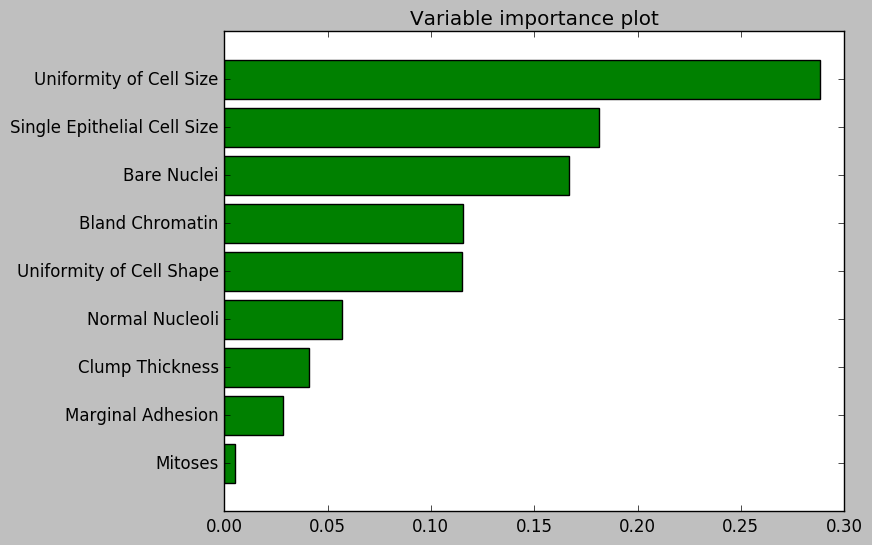

In [143]:
fimportance = clf_tree.feature_importances_
importance = pd.DataFrame(fimportance, index=feature_names, columns=["Importance"])

importance = importance.sort_values("Importance",ascending=False).head(30)

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
names = importance.index
y_pos = np.arange(importance.shape[0])
x = importance.ix[:, 0]
ax.barh(y_pos, x, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(names)
ax.invert_yaxis()  # labels read top-to-bottom
#ax.set_xlabel()
ax.set_title("Variable importance plot")
plt.savefig("Variable_importance_plot.png",bbox_inches='tight')
plt.show()

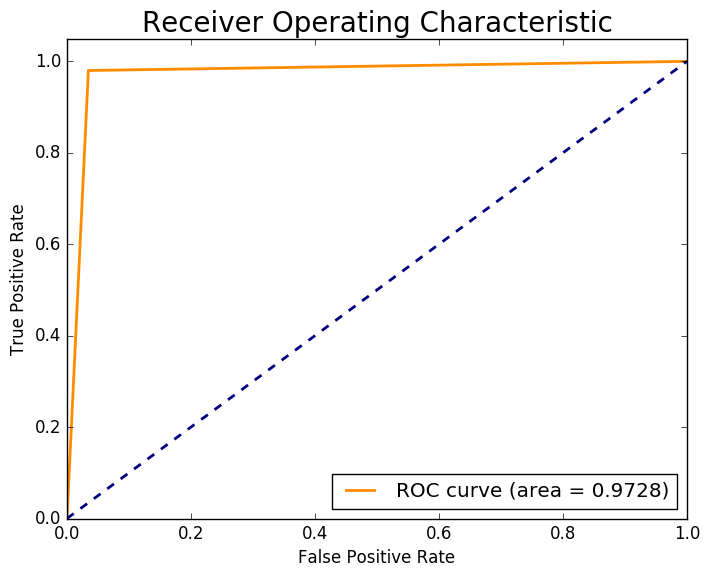

In [144]:


fpr, tpr, thresh = roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr)
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic',fontsize=20)
plt.legend(loc="lower right")
fig1 = plt.gcf()
plt.show()

In [82]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_predict = logistic_model.predict(X_test)
show_accuracy(y_test,y_predict)

Accuracy = 0.948905 percision = 0.946660 recall= 0.942759 F1_score= 0.944646


In [74]:
clf_svm = svm.SVC()
clf_svm.fit(X_train, y_train) 




C_range = np.logspace(5,10, 3)
gamma_range = np.logspace(-5, -3, 9)
param_grid = {'C': C_range,'gamma':gamma_range}
grid = GridSearchCV(clf_svm, param_grid, verbose=1)
grid.fit(X_train, y_train)
clf = grid.best_estimator_
bestC=grid.best_estimator_.C
bestGamma=grid.best_estimator_.gamma

print 'Best Parameters=',bestC, bestGamma

y_predict = clf.predict(X_test)
#print 'accuracy = ', clf.score(X_test,y_test)
print classification_report(y_test,y_predict,target_names = ['Benign','Malignant'])
show_accuracy(y_test,y_predict)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters= 100000.0 1e-05
             precision    recall  f1-score   support

     Benign       0.99      0.95      0.97        87
  Malignant       0.92      0.98      0.95        50

avg / total       0.96      0.96      0.96       137

Accuracy = 0.963504 percision = 0.956312 recall= 0.967011 F1_score= 0.961108


[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:   18.0s finished
